In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.mlab as mlab
from scipy.stats import norm
from datetime import datetime, timedelta, date

In [2]:
df_confirmed = pd.read_csv('../data/Data_CSV/COVID19_Confirmed.csv')
df_deaths = pd.read_csv('../data/Data_CSV/COVID19_Deaths.csv')
df_evolution = pd.read_csv('../data/Data_CSV/COVID19_Evolution_Confirmed.csv')
df_deaths_info = pd.read_csv('../data/Data_CSV/COVID19_Deaths_Information.csv')

In [3]:
df_confirmed['total_cases'] = df_confirmed.sum(axis=1)
df_deaths['total_deaths'] = df_deaths.sum(axis=1)

### Cleaning data

In [4]:
df_confirmed.rename(columns={'Unnamed: 0':'Provincia'}, inplace=True)
df_confirmed.set_index('Provincia',inplace = True)

df_deaths.rename(columns={'Unnamed: 0':'Provincia'}, inplace=True)
df_deaths.set_index('Provincia',inplace = True)

df_deaths_info.rename(columns={'Unnamed: 0':'Fecha', 'sexo':'Sexo', 'edad':'Edad', 'provincia':'Provincia'}, inplace=True)
df_deaths_info.set_index('Fecha',inplace = True)


# Updated

In [5]:
print('Last information update: {}'.format((date.today()-timedelta(days=2)).strftime("%d/%m/%Y")))

Last information update: 19/04/2020


# Infected people

In [6]:
print('Infected people: {}'.format(df_confirmed['total_cases'].sum()))

Infected people: 2839


# Deaths

In [7]:
print('Deaths: {}'.format(df_deaths['total_deaths'].sum()))

Deaths: 132


# Infected people by province/region

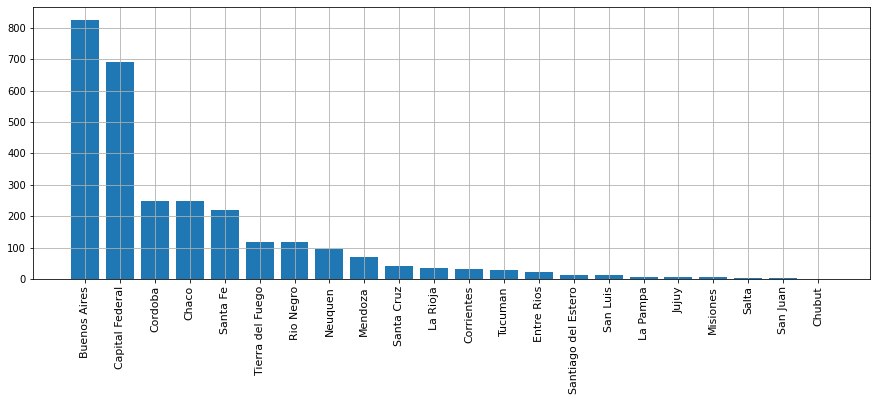

Provincia
Buenos Aires           825
Capital Federal        691
Cordoba                249
Chaco                  248
Santa Fe               221
Tierra del Fuego       119
Rio Negro              119
Neuquen                 96
Mendoza                 69
Santa Cruz              40
La Rioja                35
Corrientes              31
Tucuman                 30
Entre Rios              22
Santiago del Estero     12
San Luis                11
La Pampa                 5
Jujuy                    5
Misiones                 5
Salta                    3
San Juan                 2
Chubut                   1
Name: total_cases, dtype: int64

In [8]:
has_cases = df_confirmed['total_cases'] > 0
provinces_with_cases = df_confirmed[has_cases].sort_values(by=['total_cases'], ascending=False)


plt.figure(figsize=(15,5))
plt.bar(provinces_with_cases.index,provinces_with_cases['total_cases'])
plt.xticks(provinces_with_cases.index, rotation='vertical', size=11)
plt.grid()
plt.show()

provinces_with_cases['total_cases']

# Deaths at the provinces/regions with infected people

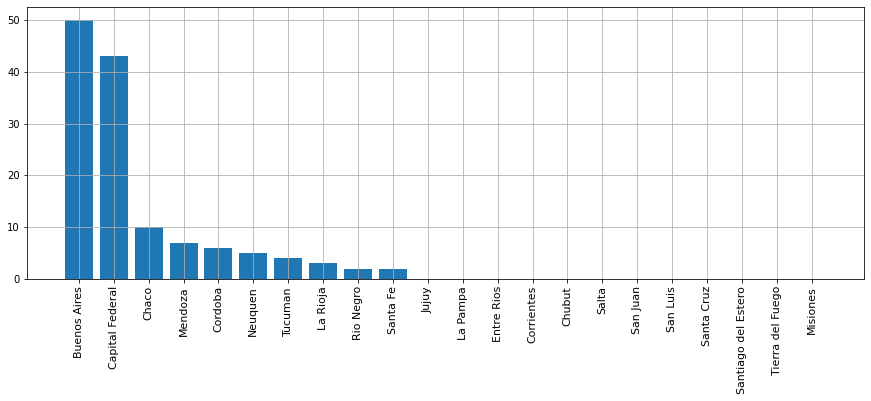

Provincia
Buenos Aires           50
Capital Federal        43
Chaco                  10
Mendoza                 7
Cordoba                 6
Neuquen                 5
Tucuman                 4
La Rioja                3
Rio Negro               2
Santa Fe                2
Jujuy                   0
La Pampa                0
Entre Rios              0
Corrientes              0
Chubut                  0
Salta                   0
San Juan                0
San Luis                0
Santa Cruz              0
Santiago del Estero     0
Tierra del Fuego        0
Misiones                0
Name: total_deaths, dtype: int64

In [9]:
deaths_of_infected_provinces = df_deaths[has_cases].sort_values(by=['total_deaths'], ascending=False)

plt.figure(figsize=(15,5))
plt.bar(deaths_of_infected_provinces.index,deaths_of_infected_provinces['total_deaths'])
plt.xticks(deaths_of_infected_provinces.index, rotation='vertical', size=11)
plt.grid()
plt.show()


deaths_of_infected_provinces['total_deaths']

In [10]:
#Histograma de muertes por edad

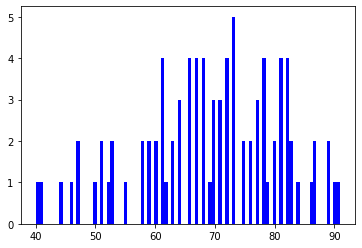

In [11]:
#reference https://pythonspot.com/matplotlib-histogram/
x = df_deaths_info[df_deaths_info['Edad'].notna()]['Edad']
n, bins, patches = plt.hist(x,90, facecolor='blue')
plt.show()

#TODO habria que plotear la curva que mejor se adapta al histograma, buscar norm de scipy

In [12]:
# muertes por grupo de edades

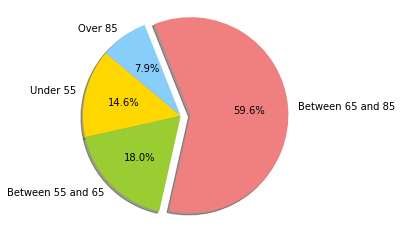

In [13]:
# Prepare data
def deaths_info_age_filt(inf_limit, sup_limit):
    return ((df_deaths_info['Edad'] >= inf_limit) & (df_deaths_info['Edad'] <= sup_limit))

total = df_deaths_info['Edad'].count()
under55 = df_deaths_info[deaths_info_age_filt(0,55)]['Edad'].count() / total 
bet55n65 = df_deaths_info[deaths_info_age_filt(56,65)]['Edad'].count() / total
bet65n85 = df_deaths_info[deaths_info_age_filt(65,85)]['Edad'].count() / total
over85 = df_deaths_info[deaths_info_age_filt(86,200)]['Edad'].count() / total

# Data to plot
labels = ['Under 55', 'Between 55 and 65', 'Between 65 and 85', 'Over 85']
sizes = [under55,bet55n65,bet65n85,over85]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0, 0, 0.1, 0)

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

# Provinces with infected people and no deaths

In [14]:
df_confirmed.T[deaths_of_infected_provinces.index.values].T.sort_values(by=['total_cases'], ascending=False)['total_cases']

Provincia
Buenos Aires           825
Capital Federal        691
Cordoba                249
Chaco                  248
Santa Fe               221
Rio Negro              119
Tierra del Fuego       119
Neuquen                 96
Mendoza                 69
Santa Cruz              40
La Rioja                35
Corrientes              31
Tucuman                 30
Entre Rios              22
Santiago del Estero     12
San Luis                11
La Pampa                 5
Jujuy                    5
Misiones                 5
Salta                    3
San Juan                 2
Chubut                   1
Name: total_cases, dtype: int64

# Mortality of provinces/regions with infected people

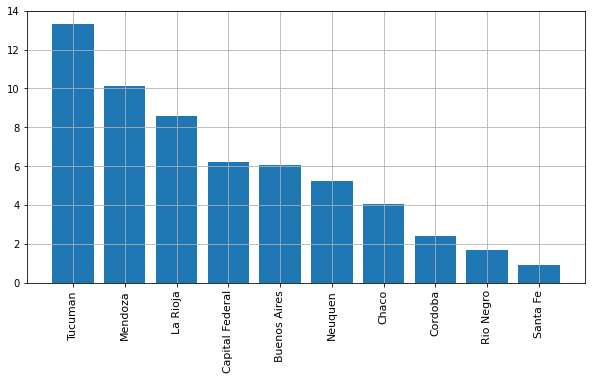

,conf total_cases,death total_deaths,% death
Provincia,,,
Tucuman,30,4,13.333333
Mendoza,69,7,10.144928
La Rioja,35,3,8.571429
Capital Federal,691,43,6.222865
Buenos Aires,825,50,6.060606
Neuquen,96,5,5.208333
Chaco,248,10,4.032258
Cordoba,249,6,2.409639
Rio Negro,119,2,1.680672


In [15]:
tmp_confirmed = provinces_with_cases.copy()
tmp_deaths = deaths_of_infected_provinces.copy()
tmp_confirmed.columns =  ['conf ' + col_name for col_name in tmp_confirmed.columns]
tmp_deaths.columns =  ['death ' + col_name for col_name in tmp_deaths.columns]
df_confirmed_and_deaths = pd.concat([tmp_confirmed, tmp_deaths], axis=1, join='inner')

df_confirmed_and_deaths['% death'] = (df_confirmed_and_deaths['death total_deaths'] / df_confirmed_and_deaths['conf total_cases']) * 100 
df_confirmed_and_deaths.sort_values(by=['% death'], ascending=False, inplace = True)

has_deaths_percentage = df_confirmed_and_deaths['% death'] > 0
provinces_with_deaths_percentage = df_confirmed_and_deaths[has_deaths_percentage] 

plt.figure(figsize=(10,5))
plt.bar(provinces_with_deaths_percentage.index,provinces_with_deaths_percentage['% death'])
plt.xticks(provinces_with_deaths_percentage.index, rotation='vertical', size=11)
plt.grid()
plt.show()


provinces_with_deaths_percentage[['conf total_cases', 'death total_deaths','% death']]

# Daily contagion and death curve

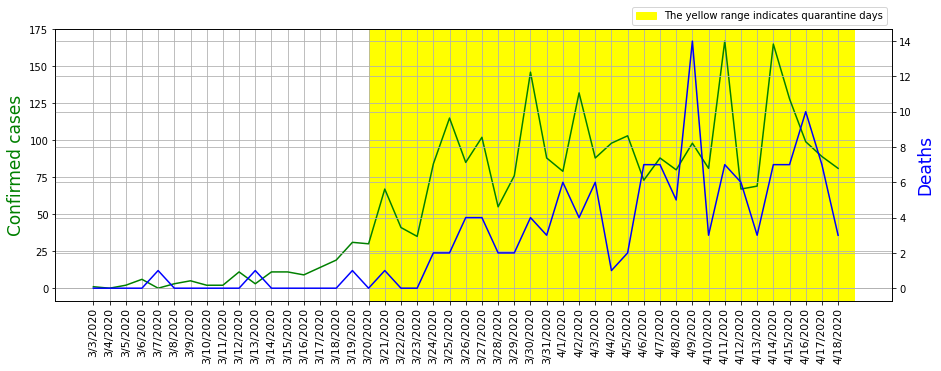

In [16]:
df_confirmed_transposed = df_confirmed.drop('total_cases',axis=1).transpose()
df_deaths_transposed = df_deaths.drop('total_deaths',axis=1).transpose()
df_deaths_transposed['total_deaths'] = df_deaths_transposed.sum(axis = 1)
df_confirmed_transposed['total_cases'] = df_confirmed_transposed.sum(axis = 1)
today = date.today()


plt.figure(figsize=(15,5))

plt.plot(df_confirmed_transposed.index, df_confirmed_transposed['total_cases'], color='g')
plt.ylabel('Confirmed cases', color='g',size=17)
plt.axvspan('3/20/2020',today.strftime("%m/%d/%Y"),color='yellow',fill=True)
plt.grid()

plt.xticks(rotation='vertical',size=11)
ax2 = plt.gca().twinx()

plt.plot(df_deaths_transposed.index, df_deaths_transposed['total_deaths'], color='b')
plt.ylabel('Deaths', color='b',size=17)
plt.grid()

quarantine = mpatches.Patch(color='yellow',label='The yellow range indicates quarantine days')
plt.legend(handles=[quarantine],bbox_to_anchor = (1,1.1))

plt.show()

# Evolutive contagion and death curve

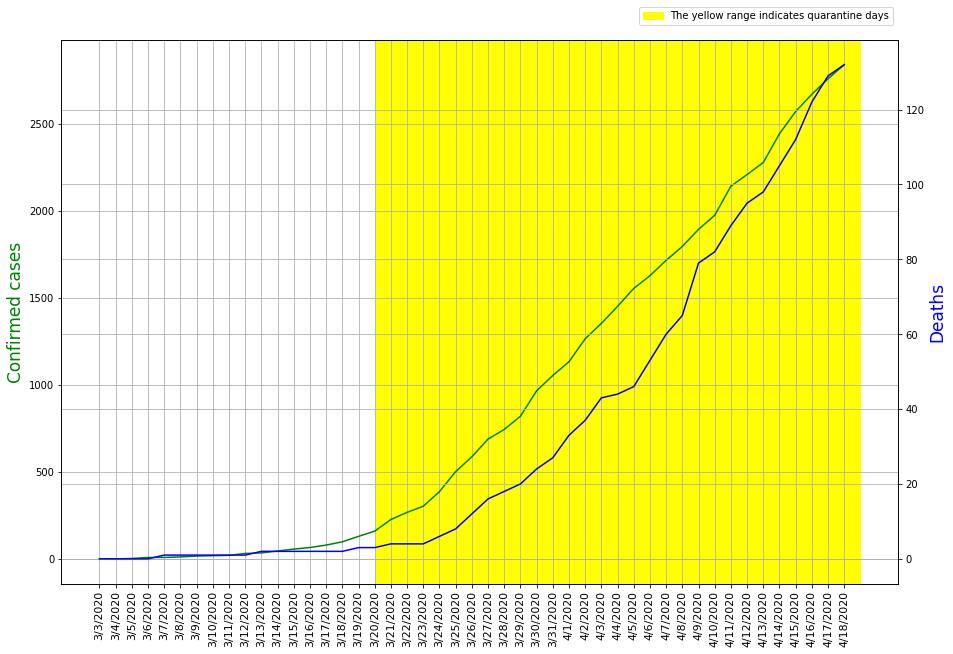

In [17]:
today = date.today()
df_confirmed_transposed['evolutive_cases'] = df_confirmed_transposed['total_cases'].cumsum()
df_deaths_transposed['evolutive_deaths'] = df_deaths_transposed['total_deaths'].cumsum()



plt.figure(figsize=(15,10))

plt.plot(df_confirmed_transposed.index, df_confirmed_transposed['evolutive_cases'], color='g')
plt.ylabel('Confirmed cases', color='g',size=17)
plt.axvspan('3/20/2020',today.strftime("%m/%d/%Y"),color='yellow',fill=True)
plt.grid()

plt.xticks(rotation='vertical',size=11)
ax2 = plt.gca().twinx()

plt.plot(df_deaths_transposed.index, df_deaths_transposed['evolutive_deaths'], color='b')
plt.ylabel('Deaths', color='b',size=17)
plt.grid()

quarantine = mpatches.Patch(color='yellow',label='The yellow range indicates quarantine days')
plt.legend(handles=[quarantine],bbox_to_anchor = (1.,1.07))

plt.show()

# Provinces

##  Reported contagions by day

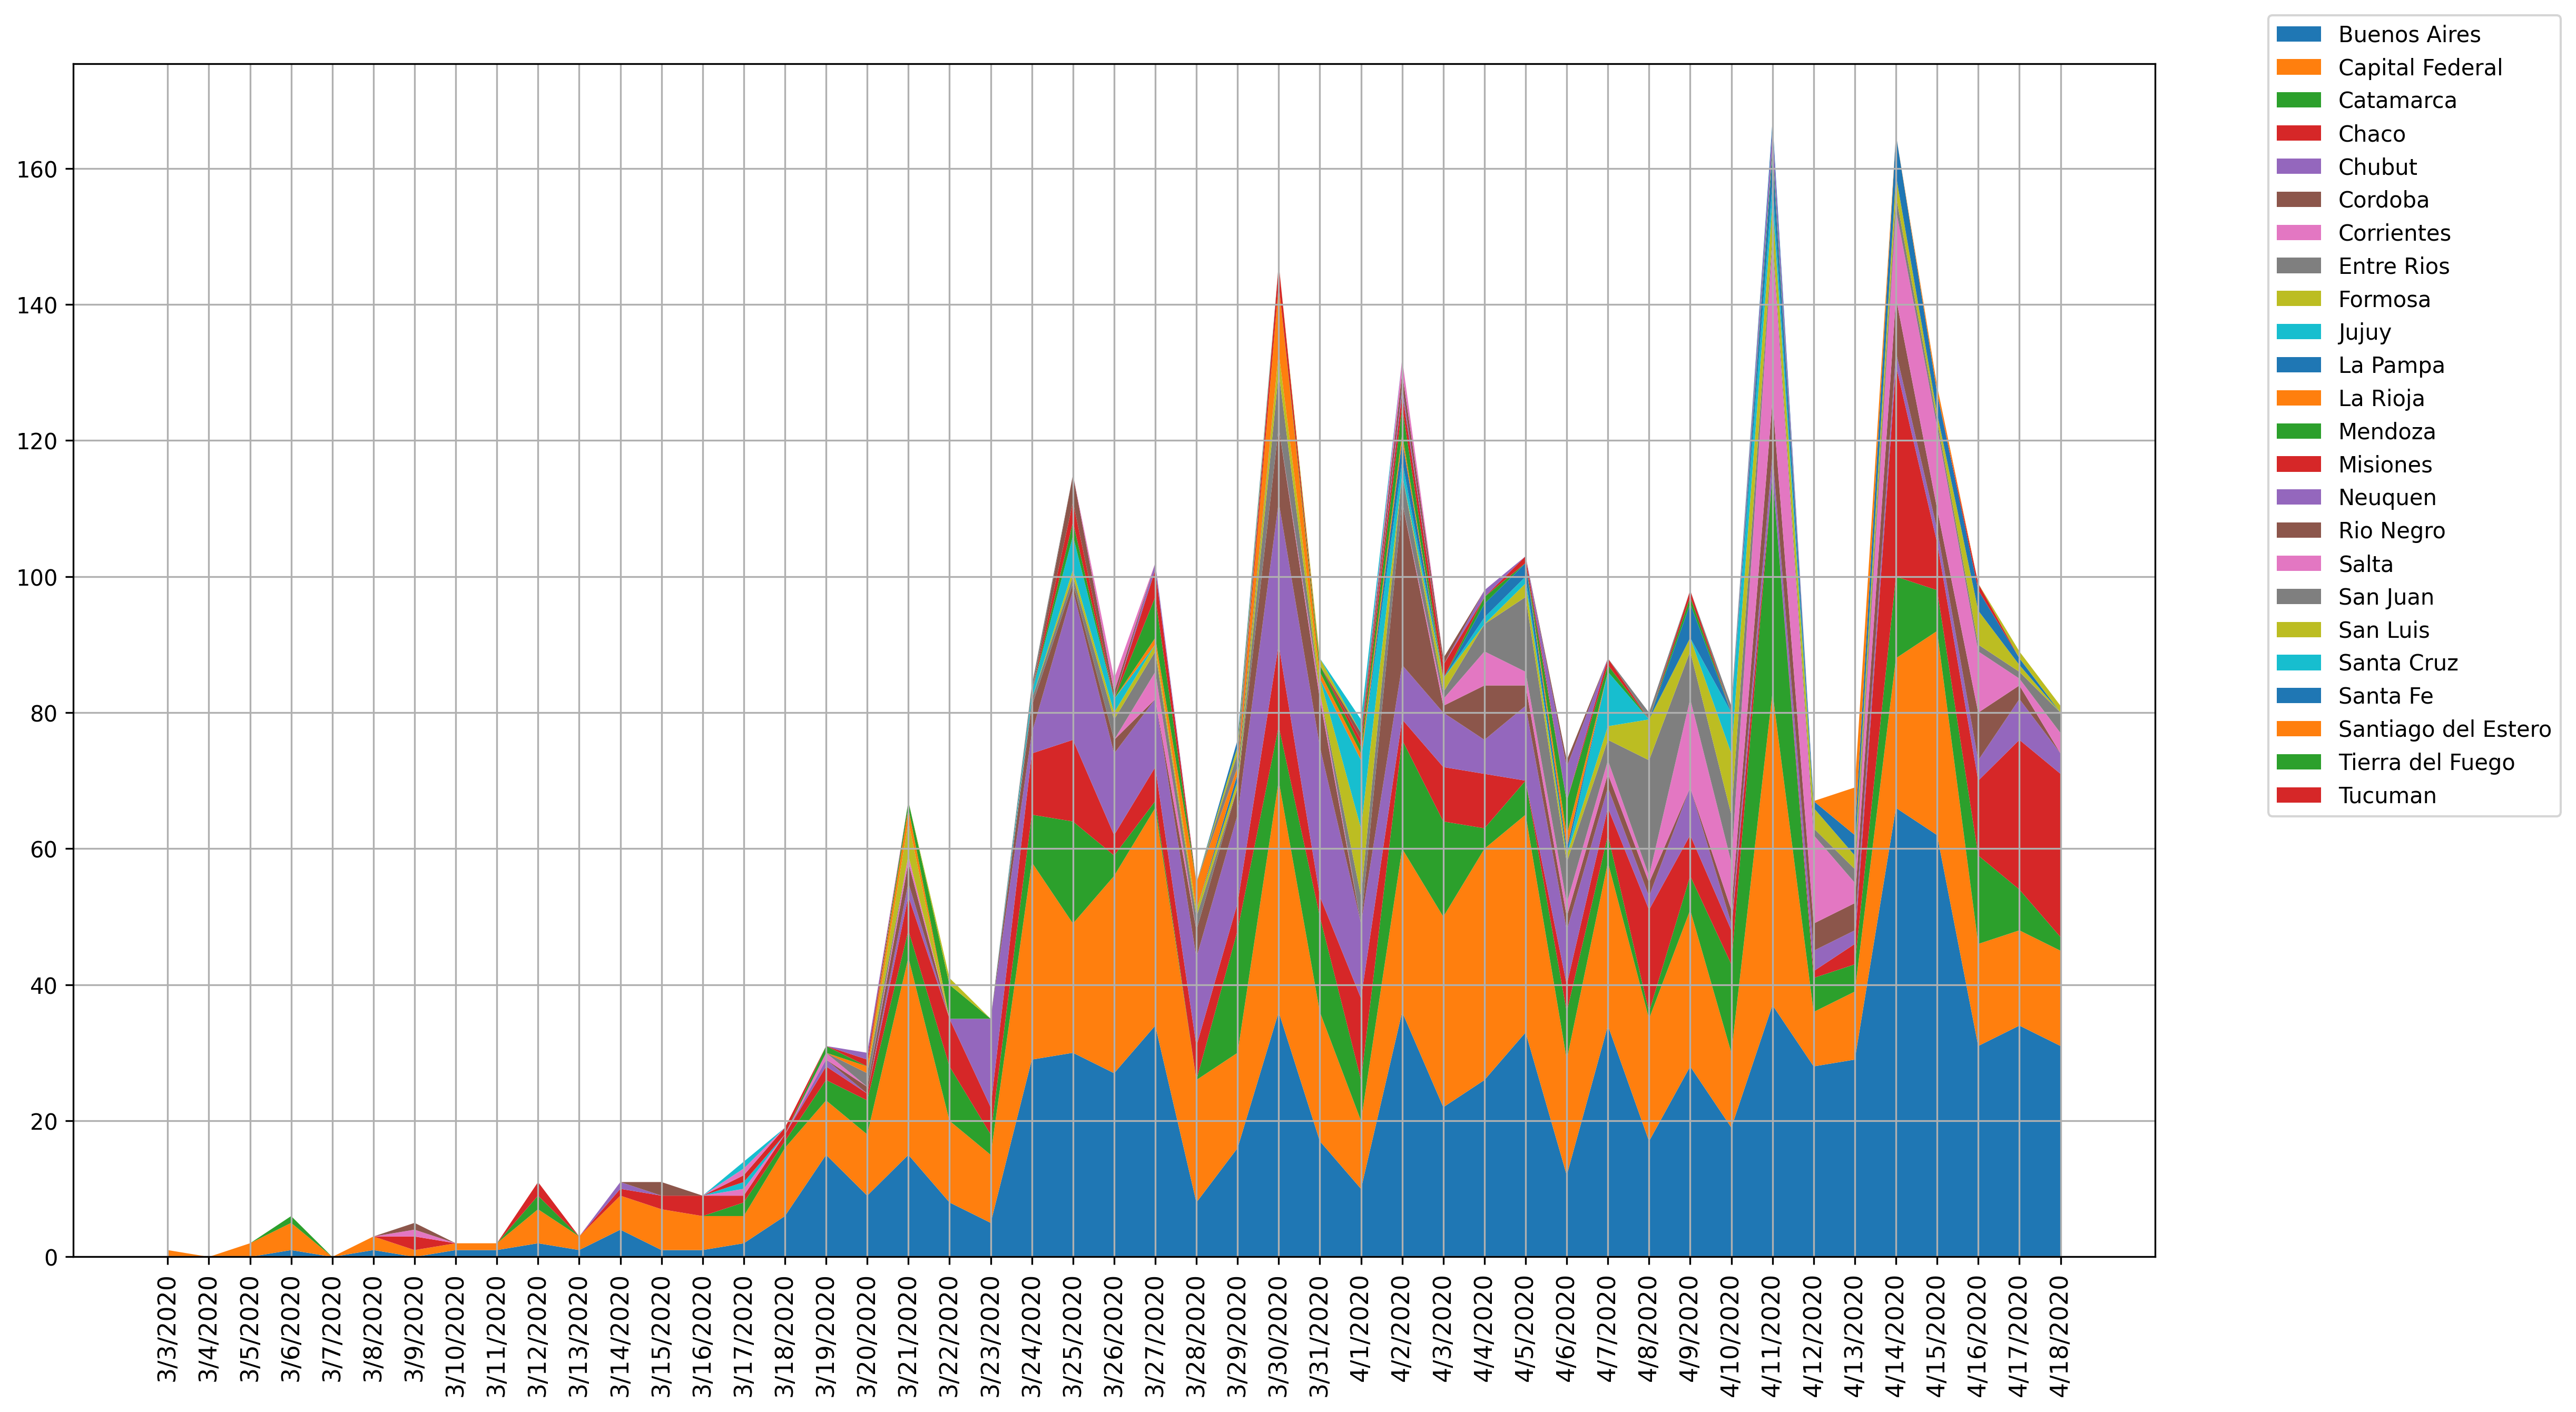

In [18]:
y = df_confirmed.sort_values(by=['total_cases'], ascending=False).drop(columns=['total_cases']).values
x = df_confirmed_transposed.drop(columns=['total_cases','evolutive_cases']).index.values


labels = df_confirmed.index.values

plt.figure(figsize=(17,10),dpi=300)
plt.stackplot(x,y, labels=labels)
plt.legend(bbox_to_anchor = (1.2,1.05))
plt.xticks(rotation='vertical', size=11)
plt.grid()
plt.show()

## Reported deaths by day

/home/facundo/Proyects/covid/data-analysis-comunidad/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


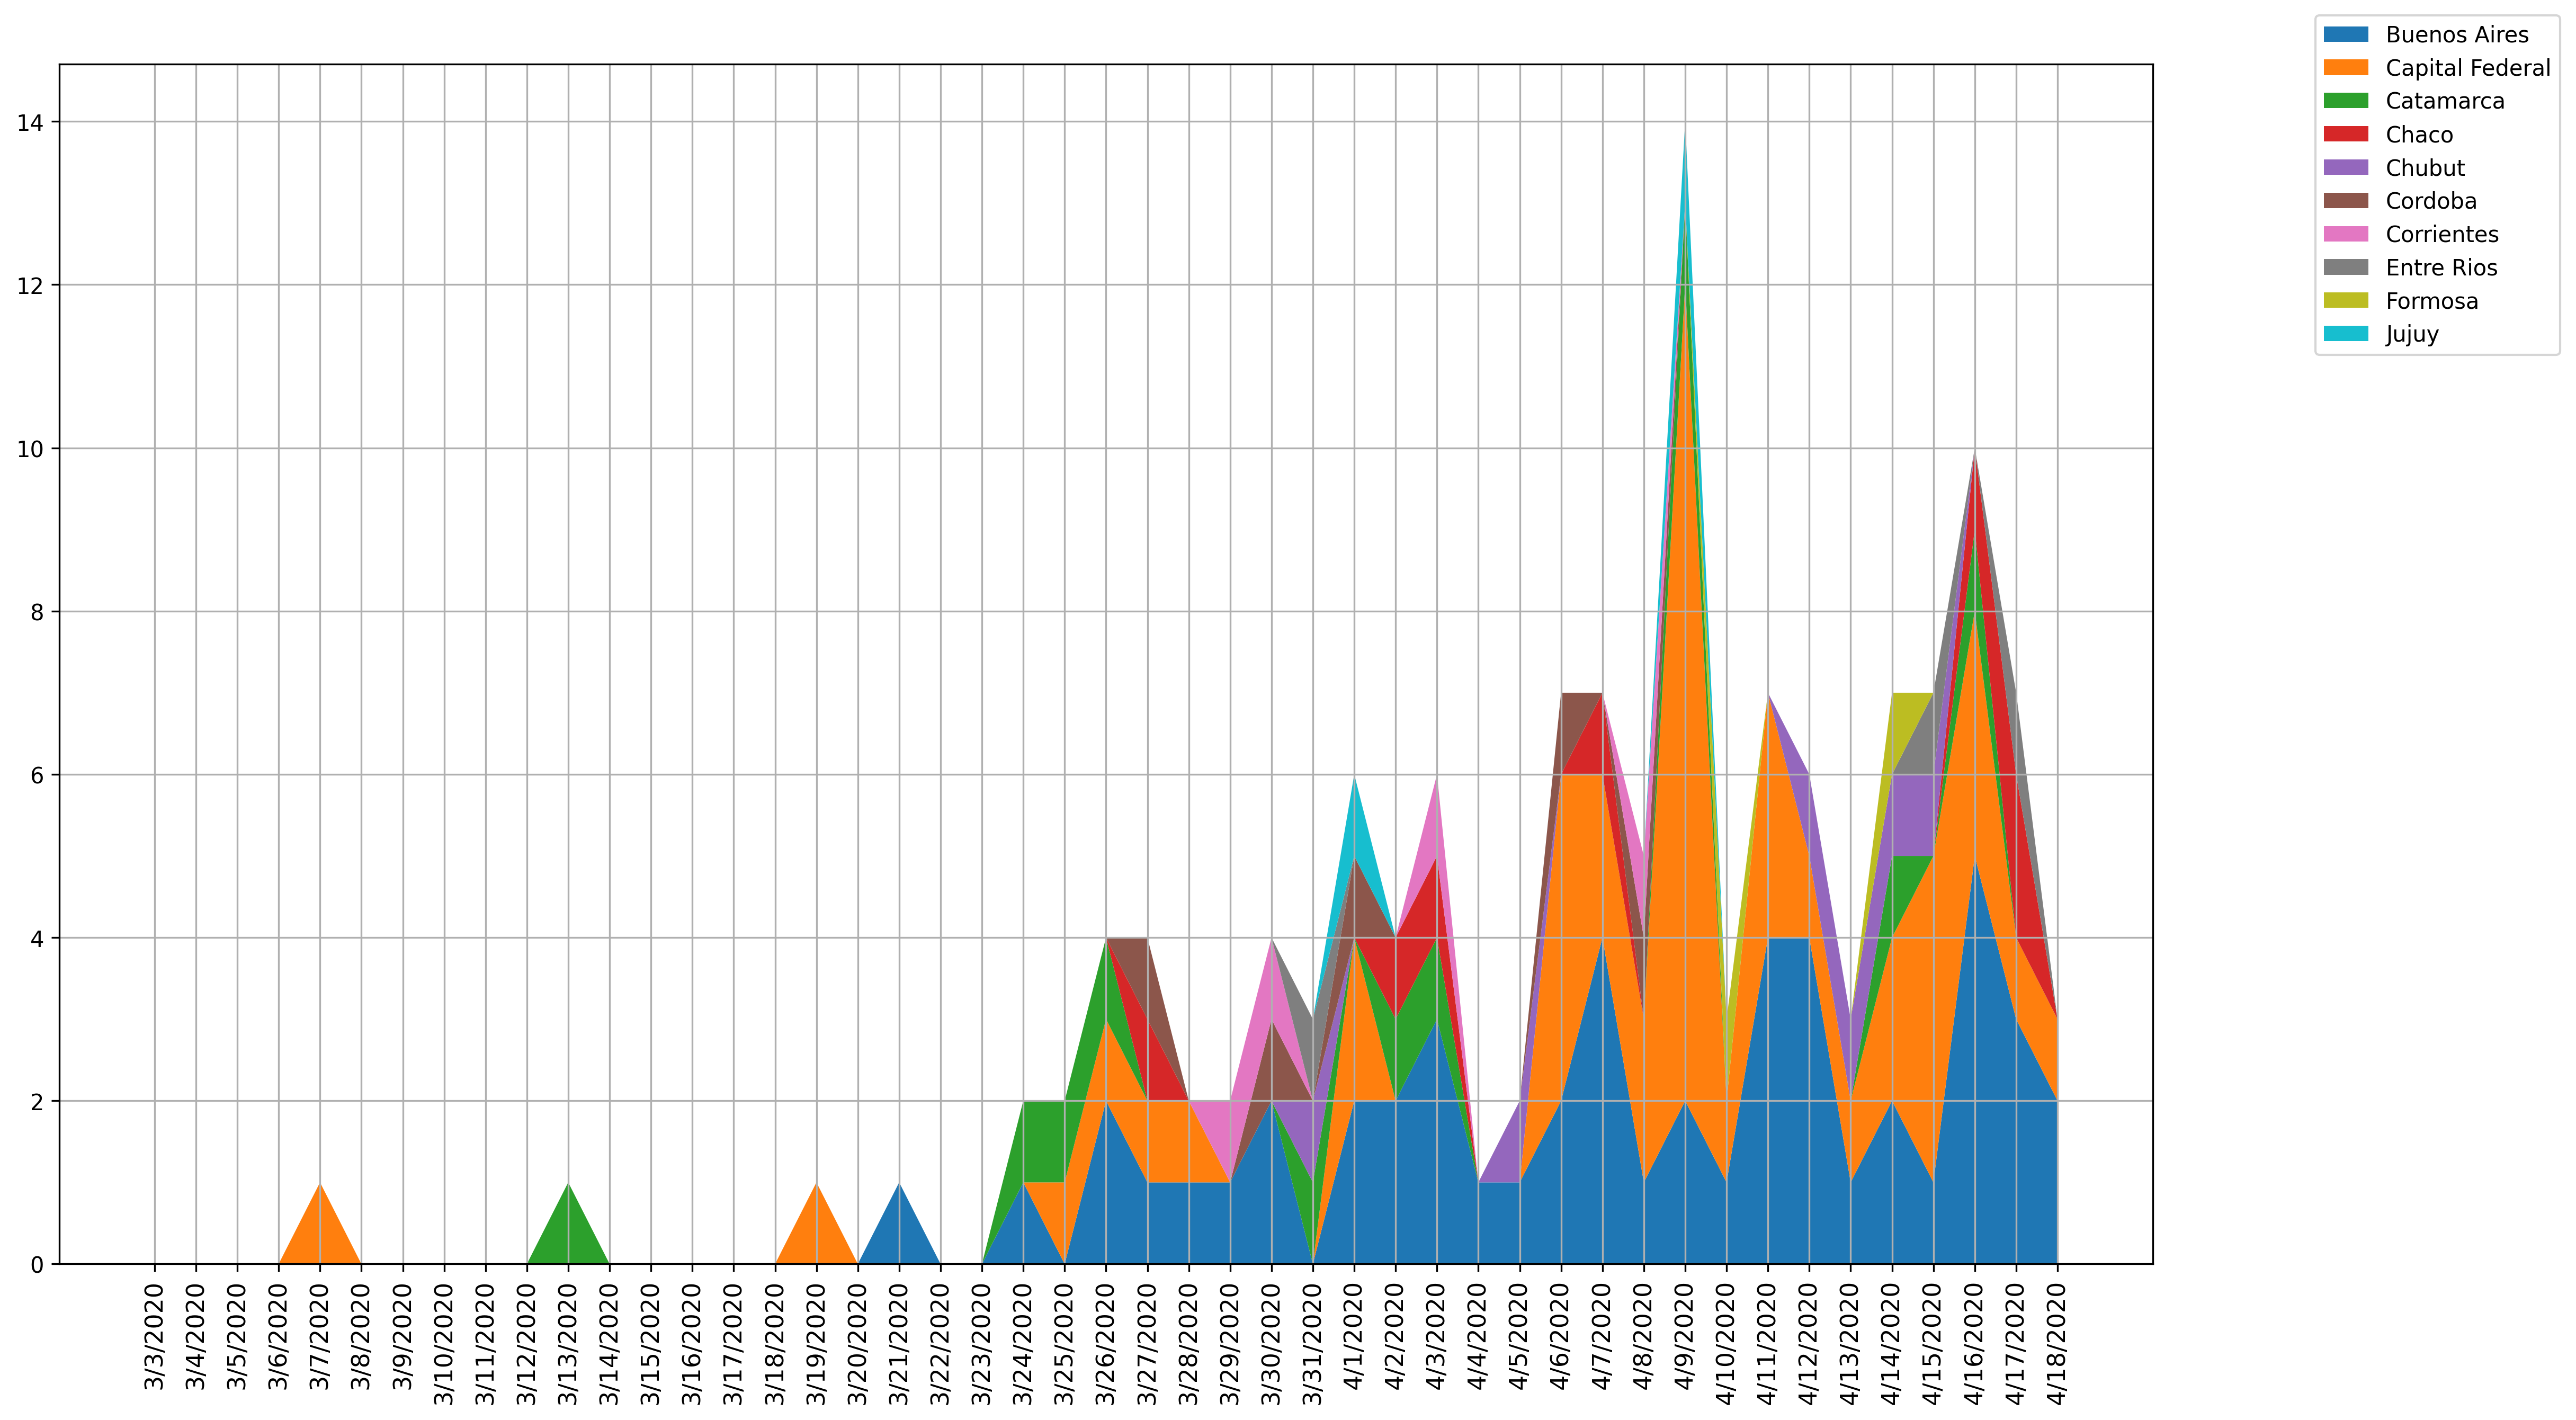

In [19]:
has_deaths = df_deaths['total_deaths'] > 0 
y = df_deaths.sort_values(by=['total_deaths'], ascending=False).drop(columns=['total_deaths'])[has_deaths].values
x = df_deaths_transposed.drop(columns=['total_deaths','evolutive_deaths']).index.values

labels = df_deaths.index.values
plt.figure(figsize=(17,10),dpi=300)
plt.stackplot(x,y, labels=labels)
plt.legend(bbox_to_anchor = (1.2,1.05))
plt.xticks(rotation='vertical', size=11)
plt.grid()
plt.show()

## Evolutive contagion curve

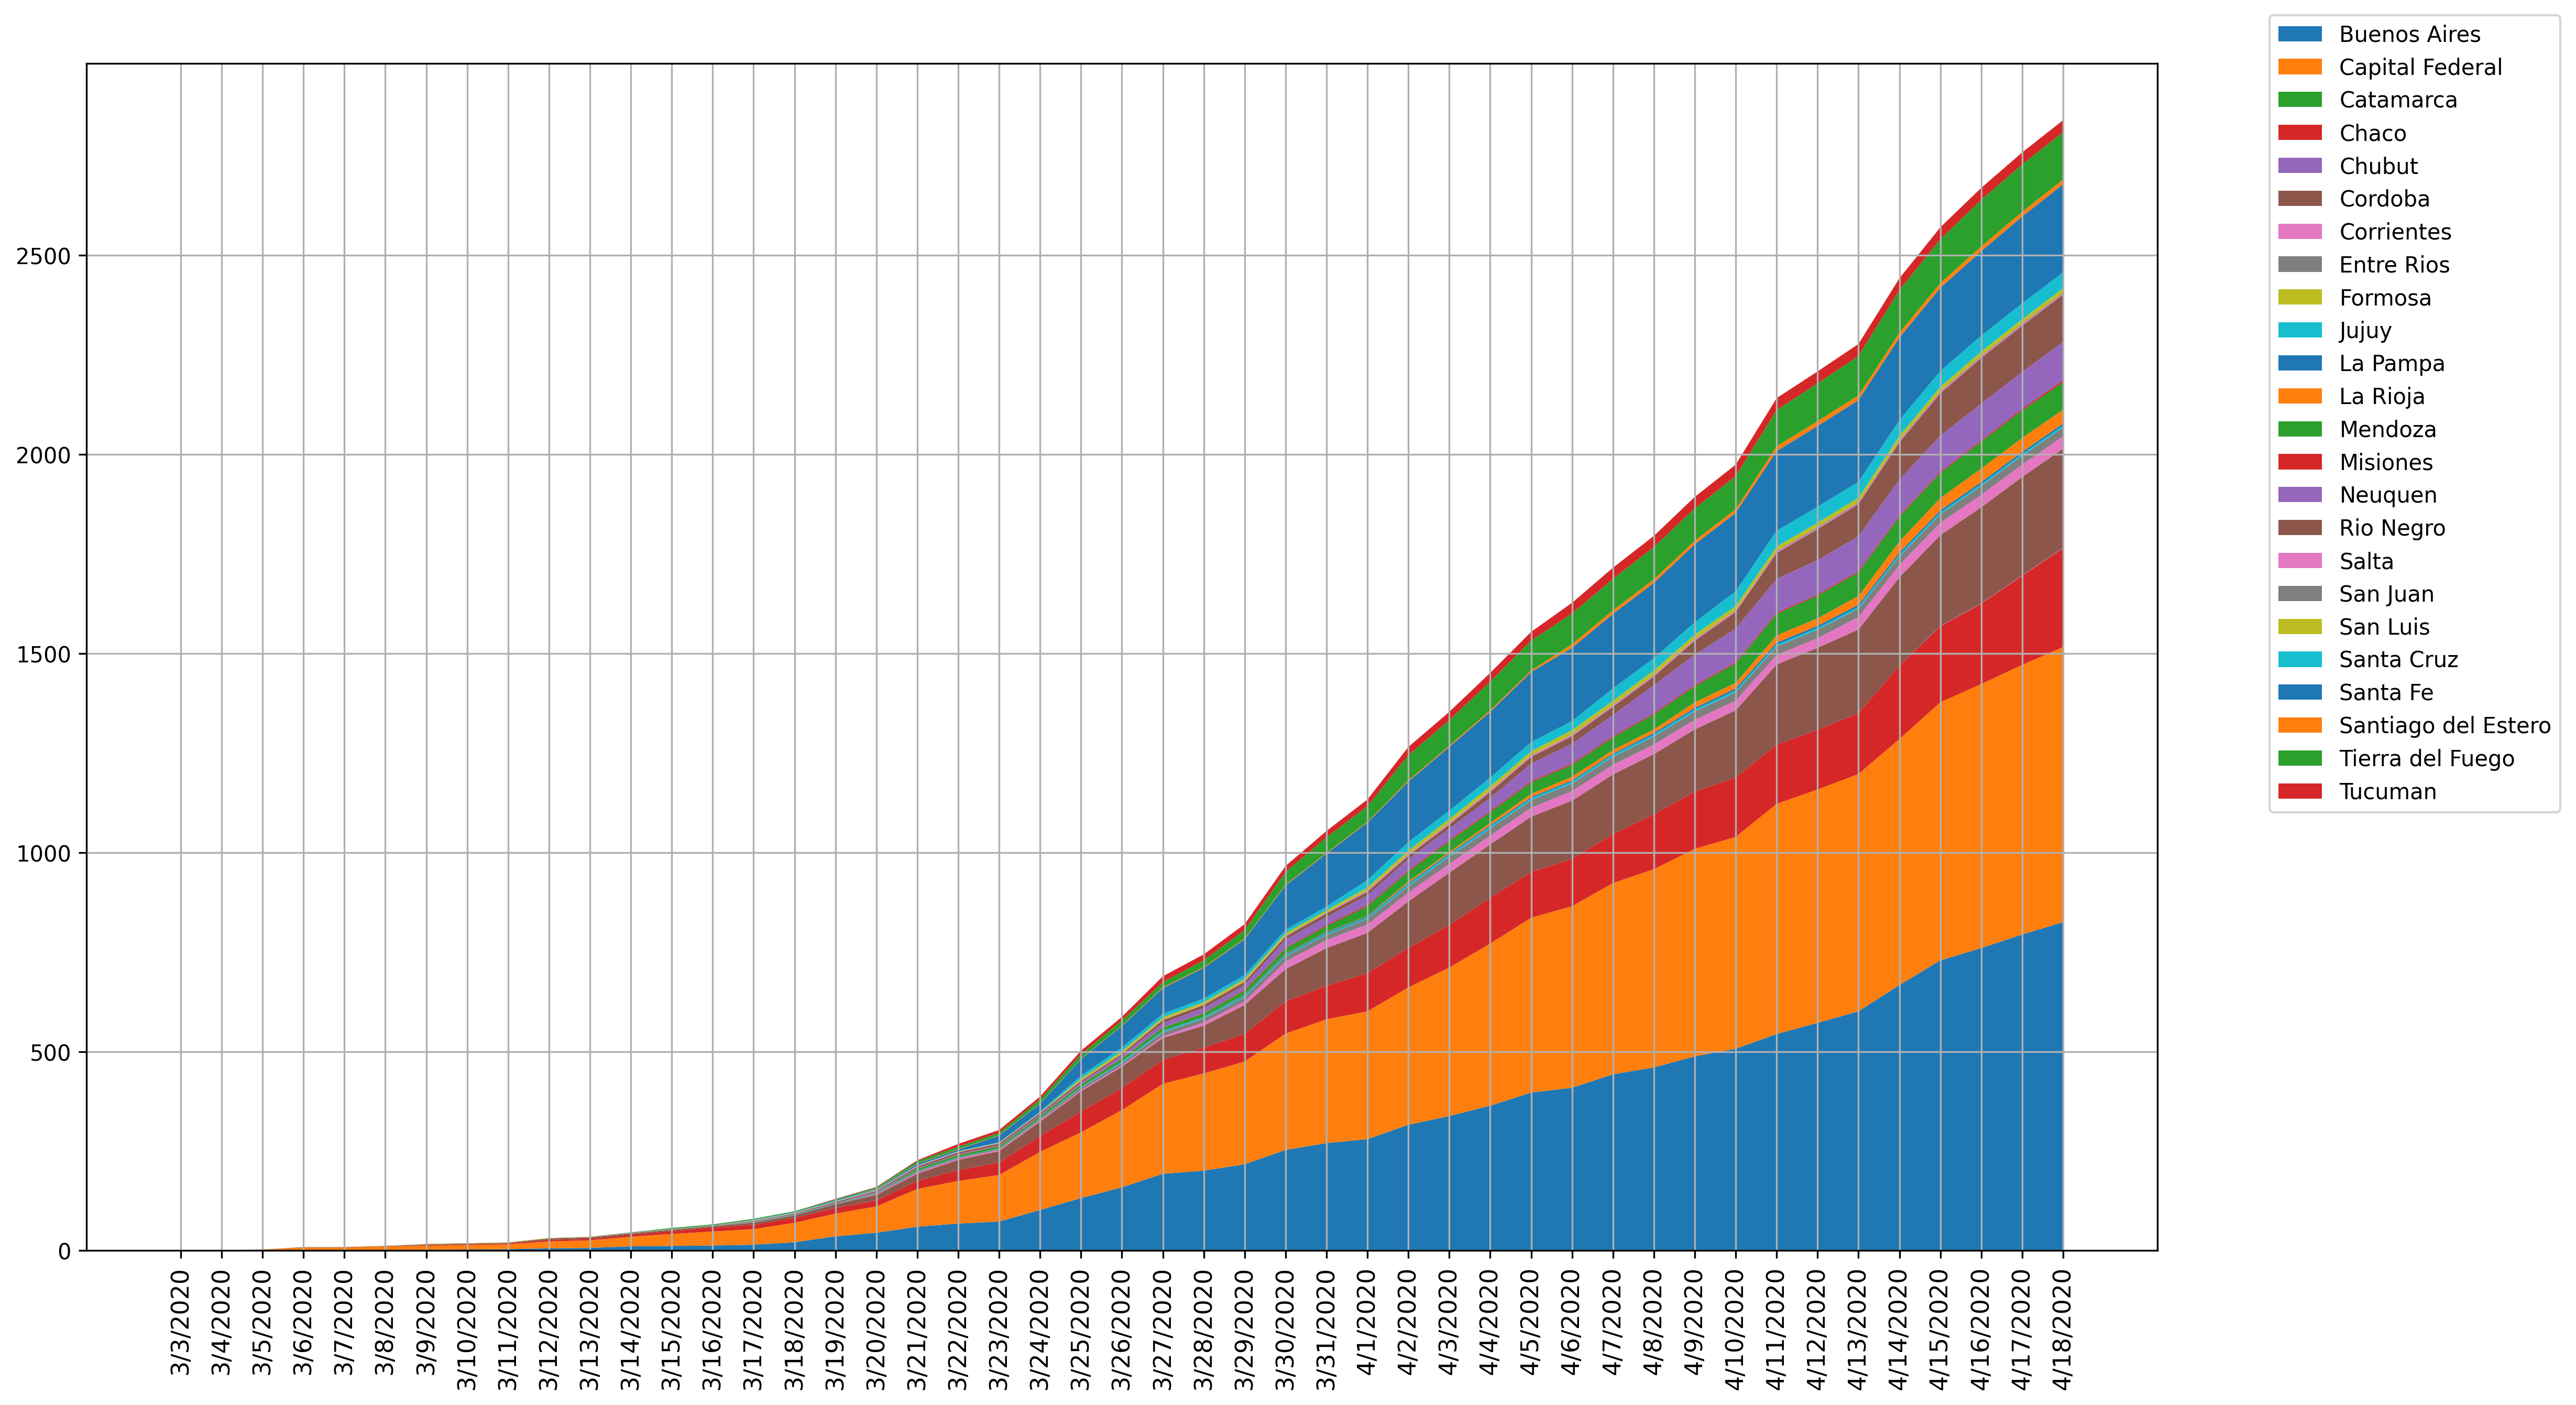

In [20]:
x = df_confirmed_transposed['evolutive_cases'].index.values
y = df_confirmed_transposed.cumsum(axis=0).drop(columns=['evolutive_cases','total_cases']).T
                                           
labels = df_confirmed.index.values
plt.figure(figsize=(17,10),dpi=300)
plt.stackplot(x,y, labels=labels)
plt.legend(bbox_to_anchor = (1.2,1.05))
plt.xticks(rotation='vertical', size=11)
plt.grid()
plt.show()

## Evolutive death curve

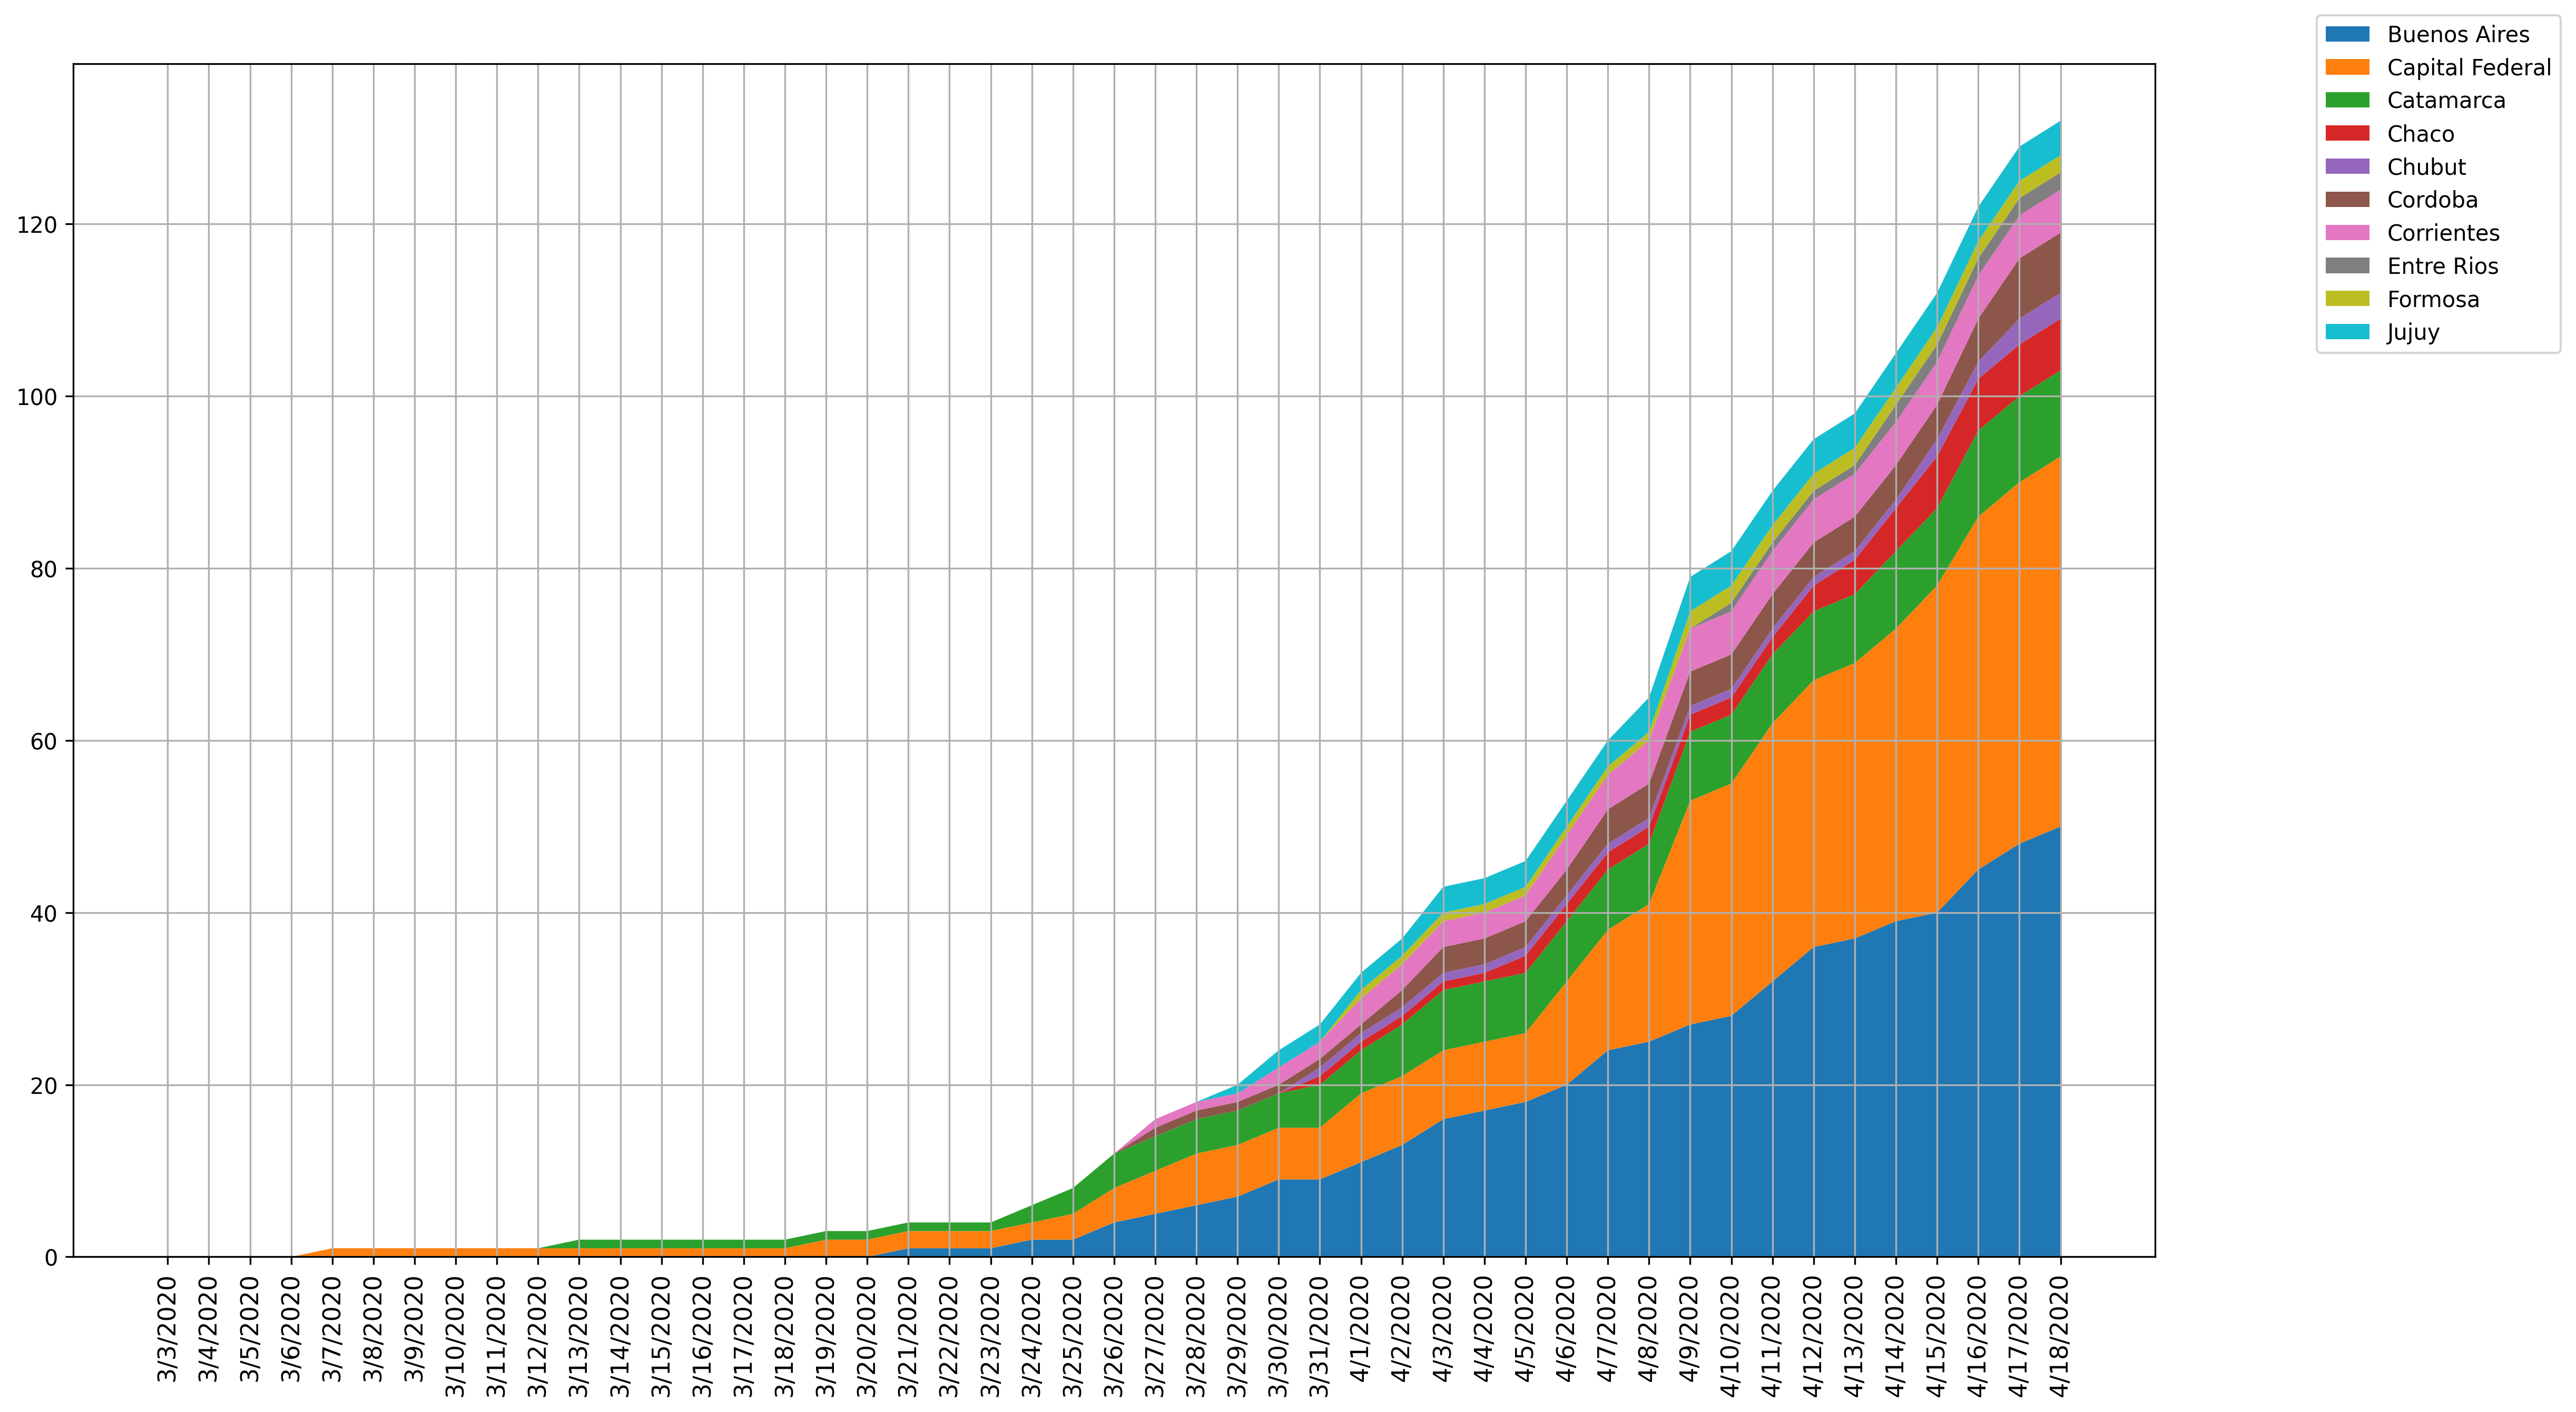

In [21]:
has_deaths = df_deaths['total_deaths'] > 0
x = df_deaths_transposed['evolutive_deaths'].index.values
y = df_deaths[has_deaths].drop(columns=['total_deaths']).T.cumsum(axis=0).T                                      

labels = df_deaths.index.values
plt.figure(figsize=(17,10),dpi=300)
plt.stackplot(x,y, labels=labels)
plt.legend(bbox_to_anchor = (1.2,1.05))
plt.xticks(rotation='vertical', size=11)
plt.grid()
plt.show()